# Grid lines

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from synthesizer.grid import Grid, get_available_lines

In [3]:
grid_dir = '../../../tests/test_grid'
grid_name = 'test_grid'

Get list of available lines for the grid

In [20]:
line_ids = get_available_lines(grid_name, grid_dir=grid_dir)

print(line_ids)

['Al 2 1670.79A', 'Al 2 2661.15A', 'Al 2 2669.95A', 'Ar 3 7137.76A', 'Ar 3 7753.24A', 'Ar 4 4712.58A', 'Ar 4 4741.45A', 'C 2 1036.34A', 'C 2 1037.02A', 'C 2 1335.66A', 'C 2 1335.71A', 'C 2 2324.21A', 'C 2 2325.40A', 'C 2 2326.11A', 'C 2 2327.65A', 'C 2 2328.84A', 'C 2R 1335.00A', 'C 3 1906.68A', 'C 3 1908.73A', 'C 3 977.020A', 'C 4 1548.19A', 'C 4 1550.78A', 'Ca 2 3934.78A', 'Ca 2 7293.48A', 'Ca 2 7325.90A', 'Cl 3 5519.24A', 'Cl 3 5539.41A', 'Fe 2 1.25702m', 'Fe 2 1.32092m', 'Fe 2 1.37219m', 'Fe 2 1.64400m', 'Fe 2 1.80989m', 'Fe 2 2365.55A', 'Fe 2 2382.77A', 'Fe 2 2612.65A', 'Fe 2 2626.45A', 'Fe 2 8619.32A', 'Fe 3 4659.31A', 'Fe 3 4702.94A', 'Fe 3 4755.97A', 'Fe 3 4882.48A', 'Fe 3 5012.56A', 'Fe 3 5271.87A', 'Fe 4 2830.19A', 'Fe 4 2836.57A', 'Fe 4 3095.86A', 'H 1 1.00521m', 'H 1 1.09410m', 'H 1 1.28215m', 'H 1 1.49713m', 'H 1 1.55606m', 'H 1 1.57048m', 'H 1 1.58848m', 'H 1 1.61136m', 'H 1 1.64116m', 'H 1 1.68110m', 'H 1 1.73667m', 'H 1 1.81790m', 'H 1 1.87561m', 'H 1 1.94507m', 'H 1 10

Read in just some specific lines (excluding spectra), note any line inside the nested brackets is interpreted as a doublet

In [12]:
lines = ['H 1 4862.69A', 'O 3 4960.29A', 'O 3 5008.24A',
         ['O 3 4960.29A', 'O 3 5008.24A'], 'H 1 6564.62A']
grid = Grid(grid_name, grid_dir=grid_dir, read_spectra=False, read_lines=lines)

Alternatively we could read in all lines by simply setting read_lines to be True

In [21]:
grid = Grid(grid_name, grid_dir=grid_dir, read_spectra=False, read_lines=True)
print(grid.line_list)

['Al 2 1670.79A', 'Al 2 2661.15A', 'Al 2 2669.95A', 'Ar 3 7137.76A', 'Ar 3 7753.24A', 'Ar 4 4712.58A', 'Ar 4 4741.45A', 'C 2 1036.34A', 'C 2 1037.02A', 'C 2 1335.66A', 'C 2 1335.71A', 'C 2 2324.21A', 'C 2 2325.40A', 'C 2 2326.11A', 'C 2 2327.65A', 'C 2 2328.84A', 'C 2R 1335.00A', 'C 3 1906.68A', 'C 3 1908.73A', 'C 3 977.020A', 'C 4 1548.19A', 'C 4 1550.78A', 'Ca 2 3934.78A', 'Ca 2 7293.48A', 'Ca 2 7325.90A', 'Cl 3 5519.24A', 'Cl 3 5539.41A', 'Fe 2 1.25702m', 'Fe 2 1.32092m', 'Fe 2 1.37219m', 'Fe 2 1.64400m', 'Fe 2 1.80989m', 'Fe 2 2365.55A', 'Fe 2 2382.77A', 'Fe 2 2612.65A', 'Fe 2 2626.45A', 'Fe 2 8619.32A', 'Fe 3 4659.31A', 'Fe 3 4702.94A', 'Fe 3 4755.97A', 'Fe 3 4882.48A', 'Fe 3 5012.56A', 'Fe 3 5271.87A', 'Fe 4 2830.19A', 'Fe 4 2836.57A', 'Fe 4 3095.86A', 'H 1 1.00521m', 'H 1 1.09410m', 'H 1 1.28215m', 'H 1 1.49713m', 'H 1 1.55606m', 'H 1 1.57048m', 'H 1 1.58848m', 'H 1 1.61136m', 'H 1 1.64116m', 'H 1 1.68110m', 'H 1 1.73667m', 'H 1 1.81790m', 'H 1 1.87561m', 'H 1 1.94507m', 'H 1 10

We can also calculate luminosities and equivalent widths for a single line ...

In [24]:
grid_point = (5, 6)  # ia, iZ the age and metallicity grid point

line = grid.get_line_info('H 1 4862.69A', grid_point)
print(line)

----------
SUMMARY OF H 1 4862.69A
wavelength: 4862.7 Å
log10(luminosity/erg/s): 34.19
equivalent width: 202 Å
----------


Or a combination of lines, e.g. a doublet

In [27]:
line = grid.get_lines_info(['H 1 4862.69A', 'O 3 4960.29A', 'O 3 5008.24A'], grid_point)
print(line)

----------
LINE COLLECTION
lines: ['H 1 4862.69A', 'O 3 4960.29A', 'O 3 5008.24A']
available ratios: ['BalmerDecrement', 'N2', 'S2', 'O1', 'R2', 'R3', 'R23', 'O32', 'Ne3O2']
available diagrams: ['OHNO', 'BPT-NII']
----------


In [28]:
lines = grid.get_lines_info(line_ids, grid_point)
print(lines)

----------
LINE COLLECTION
lines: ['Al 2 1670.79A', 'Al 2 2661.15A', 'Al 2 2669.95A', 'Ar 3 7137.76A', 'Ar 3 7753.24A', 'Ar 4 4712.58A', 'Ar 4 4741.45A', 'C 2 1036.34A', 'C 2 1037.02A', 'C 2 1335.66A', 'C 2 1335.71A', 'C 2 2324.21A', 'C 2 2325.40A', 'C 2 2326.11A', 'C 2 2327.65A', 'C 2 2328.84A', 'C 2R 1335.00A', 'C 3 1906.68A', 'C 3 1908.73A', 'C 3 977.020A', 'C 4 1548.19A', 'C 4 1550.78A', 'Ca 2 3934.78A', 'Ca 2 7293.48A', 'Ca 2 7325.90A', 'Cl 3 5519.24A', 'Cl 3 5539.41A', 'Fe 2 1.25702m', 'Fe 2 1.32092m', 'Fe 2 1.37219m', 'Fe 2 1.64400m', 'Fe 2 1.80989m', 'Fe 2 2365.55A', 'Fe 2 2382.77A', 'Fe 2 2612.65A', 'Fe 2 2626.45A', 'Fe 2 8619.32A', 'Fe 3 4659.31A', 'Fe 3 4702.94A', 'Fe 3 4755.97A', 'Fe 3 4882.48A', 'Fe 3 5012.56A', 'Fe 3 5271.87A', 'Fe 4 2830.19A', 'Fe 4 2836.57A', 'Fe 4 3095.86A', 'H 1 1.00521m', 'H 1 1.09410m', 'H 1 1.28215m', 'H 1 1.49713m', 'H 1 1.55606m', 'H 1 1.57048m', 'H 1 1.58848m', 'H 1 1.61136m', 'H 1 1.64116m', 'H 1 1.68110m', 'H 1 1.73667m', 'H 1 1.81790m', 'H 1 

We can measure line ratios

In [32]:
ratio = lines.get_ratio('BalmerDecrement')  # R23, R2, R3, ...
ratio

2.8973435877012976

Or loop over availalable ratios

In [34]:
for ratio_id in lines.available_ratios:
    ratio = lines.get_ratio(ratio_id)
    print(f'{ratio_id}: {ratio:.2f}')

BalmerDecrement: 2.90
N2: 0.10
S2: 0.09
O1: 0.01
R2: 0.55
R3: 4.28
R23: 7.01
O32: 7.78
Ne3O2: 0.15


We can plot a ratio against metallicity by looping over the metallicity grid

Text(0, 0.5, 'R23=(O 3 4960.29A,O 3 5008.24A,O 2 3727.09A,O 2 3729.88A)/(H 1 4862.69A)')

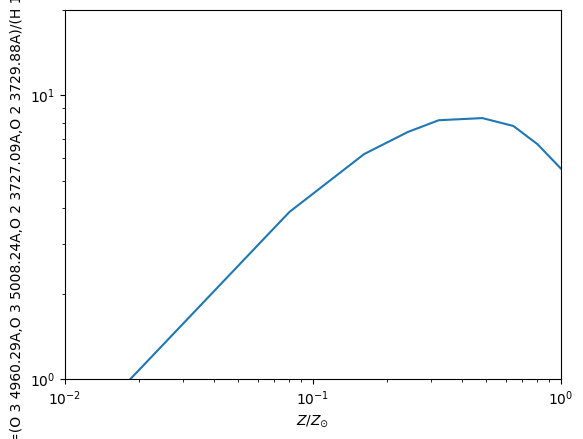

In [35]:
ratio_id = 'R23'
ia = 0  # 1 Myr old for test grid
ratios = []
for iZ, Z in enumerate(grid.metallicities):
    grid_point = (ia, iZ)
    lines = grid.get_lines_info(line_ids, grid_point)
    ratios.append(lines.get_ratio(ratio_id))

Zsun = grid.metallicities/0.0124
plt.plot(Zsun, ratios)
plt.xlim([0.01, 1])
plt.ylim([1, 20])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$Z/Z_{\odot}$')
plt.ylabel(lines.get_ratio_label(ratio_id))

We can also generate "diagrams" pairs of line ratios like the BPT diagram

Text(0, 0.5, '(OIII 5008)/(HI 4863)')

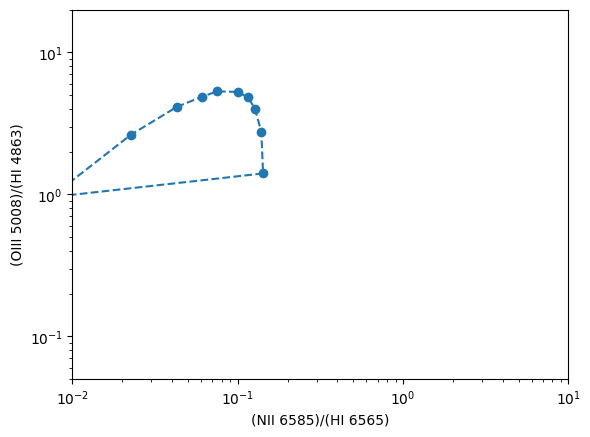

In [38]:
diagram_id = 'BPT-NII'
ia = 0  # 1 Myr old for test grid
x = []
y = []
for iZ, Z in enumerate(grid.metallicities):
    grid_point = (ia, iZ)
    lines = grid.get_lines_info(line_ids, grid_point)
    x_, y_ = lines.get_diagram(diagram_id)
    x.append(x_)
    y.append(y_)

plt.scatter(x, y)
plt.plot(x, y, linestyle='dashed')
plt.xlim([0.01, 10])
plt.ylim([0.05, 20])
plt.xscale('log')
plt.yscale('log')

# grab x and y labels, this time use "fancy" label ids
xlabel, ylabel = lines.get_diagram_label(diagram_id, fancy=True)

plt.xlabel(xlabel)
plt.ylabel(ylabel)